In [1]:
from pathlib import Path
import math
import os
import time
import shutil
import matplotlib.pyplot as plt

In [2]:
MNIST_URL = "https://github.com/MrHeadbang/machineLearning/raw/main/mnist.zip"
path_data = Path("data")
path_data.mkdir(exist_ok=True)
path_zip = path_data / "mnist.zip"

In [3]:
from urllib.request import urlretrieve
if not path_zip.exists(): urlretrieve(MNIST_URL, path_zip)

In [4]:
!ls -lh {path_data}

total 17M
-rw-r--r-- 1 nblzv nblzv 17M Jul 14 16:23 mnist.zip


In [5]:
import gzip
import pickle
with gzip.open(path_zip) as f: 
    data = pickle.load(f, encoding="latin-1")

In [6]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = data

In [7]:
x_train, y_train, x_val, y_val, x_test, y_test = map(list, (x_train, y_train, x_val, y_val, x_test, y_test))
for arr in (x_train, y_train, x_val, y_val, x_test, y_test):
    if arr[0] is list:
        for i in range(len(arr)):
            arr[i] = list(arr[i])

In [8]:
vals = x_train[0][200:210]
vals

array([0.        , 0.        , 0.        , 0.19140625, 0.9296875 ,
       0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125],
      dtype=float32)

In [9]:
def chunkify(x, size):
    for i in range(0, len(x), size):
        assert i + size <= len(x)
        yield x[i:i+size]

In [10]:
list(chunkify(vals, 5))

[array([0.        , 0.        , 0.        , 0.19140625, 0.9296875 ],
       dtype=float32),
 array([0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125],
       dtype=float32)]

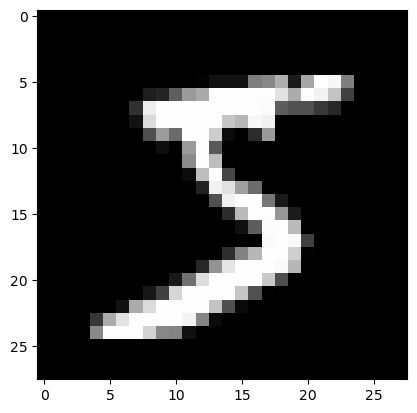

In [11]:
plt.imshow(list(chunkify(x_train[0], 28)), cmap="gray")

In [12]:
from itertools import islice
it = iter(vals)

In [13]:
subit = islice(it, 5)
list(subit)

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [14]:
subit = islice(it, 5)
list(subit)

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [15]:
subit = islice(it, 5)
list(subit)

[]

In [16]:
it = iter(x_train[0])
img = list(iter(lambda: list(islice(it, 28)), []))

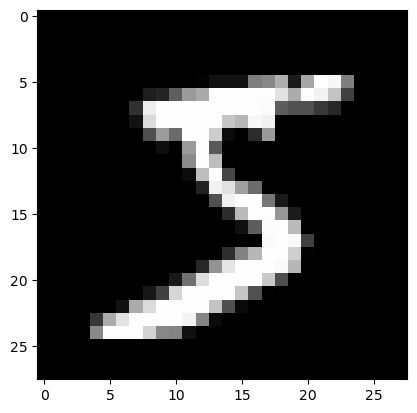

In [17]:
plt.imshow(img, cmap="gray")

In [18]:
len(img), len(img[0])

(28, 28)

In [19]:
img[20][15]

0.98828125

In [20]:
class Matrix:
    def __init__(self, x): self.x = x
    def __getitem__(self, ixs): return self.x[ixs[0]][ixs[1]]

In [21]:
m = Matrix(img)

In [22]:
m[20, 15]

0.98828125

In [23]:
import torch
tensor = torch.tensor

In [24]:
x_train, y_train, x_val, y_val, x_test, y_test = map(tensor, (x_train, y_train, x_val, y_val, x_test, y_test))

/tmp/ipykernel_1028/926785402.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1687158866840/work/torch/csrc/utils/tensor_new.cpp:261.)
  x_train, y_train, x_val, y_val, x_test, y_test = map(tensor, (x_train, y_train, x_val, y_val, x_test, y_test))


In [25]:
x_train.shape

torch.Size([50000, 784])

In [26]:
x_train.dtype

torch.float32

In [27]:
imgs = x_train.view(-1, 28, 28)
imgs.shape

torch.Size([50000, 28, 28])

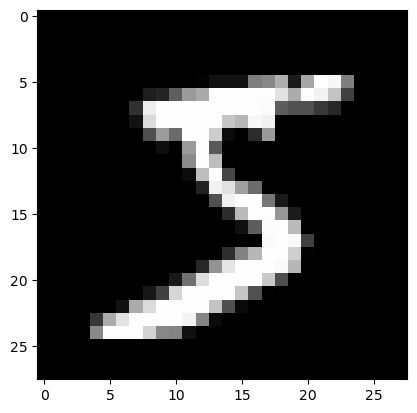

In [28]:
plt.imshow(imgs[0], cmap="gray")

In [29]:
imgs[0, 20, 15]

tensor(0.9883)

In [30]:
y_train.shape

torch.Size([50000])

In [31]:
min(y_train), max(y_train)

(tensor(0), tensor(9))

In [32]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

In [33]:
rnd_state = None
def seed(s):
    global rnd_state
    a, x = divmod(s, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [34]:
seed(1281289301)
rnd_state

(14594, 12026, 2)

In [35]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171*x)%30269
    y = (172*y)%30307
    z = (170*z)%30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [36]:
print(rnd_state)
print(rand())
print(rnd_state)

(14594, 12026, 2)
0.708377230257816
(13516, 7596, 340)


In [37]:
if os.fork():
    print("parent", rand())
else:
    print("child", rand())

parent 0.37192892999025595
child 0.37192892999025595


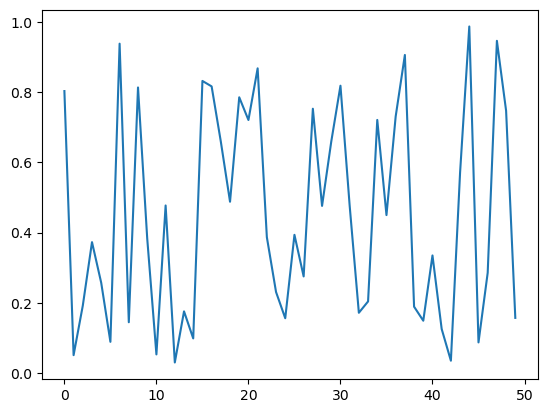

In [38]:
plt.plot([rand() for _ in  range(50)])

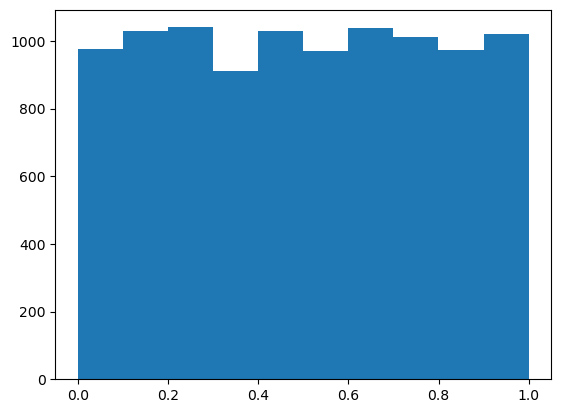

In [39]:
plt.hist([rand() for _ in range(10000)]);

In [40]:
%timeit list(chunkify([rand() for _ in range(7840)], 10))

2.7 ms ± 14.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
%timeit torch.rand(784, 10)

35.8 µs ± 107 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [42]:
torch.manual_seed(42)
weights = torch.randn(784, 10)
bias = torch.zeros(10)

In [83]:
m1 = x_val
m2 = weights

In [84]:
m1.shape, m2.shape

(torch.Size([10000, 784]), torch.Size([784, 10]))

In [85]:
ar, ac = m1.shape
br, bc = m2.shape
(ar, ac), (br, bc)

((10000, 784), (784, 10))

In [86]:
t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([10000, 10])

In [87]:
for i in range(ar, 5):
    for j in range(bc):
        for k in range(ac):
            t1[i, j] += m1[i, k] * m2[k, j]

In [88]:
t1.shape

torch.Size([10000, 10])

In [89]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
t1

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [111]:
def matmul(a, b):
    (ar, ac), (br, bc) = a.shape, b.shape
    res = torch.empty(ar, bc)
    for r in range(ar):
        for c in range(bc):
            temp = 0.0
            for i in range(ac):
                temp += a[r, i]*b[i, c]
            res[r, c] = temp
    return res

In [112]:
matmul(m1[:5], m2)

tensor([[ -5.28,  10.25,   2.07,   4.31,  -7.91, -10.03,   4.10,   1.87,   2.95,   8.23],
        [  3.70,  11.19,   4.88,  -2.83, -12.34,  -5.00,  -4.03,  -0.12,   2.48,   6.84],
        [ -0.65,   0.96,  13.61,   0.61,  -3.77,  -7.93,   5.29,   8.89,   3.50,   5.30],
        [-18.84,  10.83,   0.32, -10.01,   1.63,  -4.54,  -0.04,  -2.07,   9.84,   8.82],
        [ -8.41,   4.87,   0.95,  13.35, -13.55,  -2.51,   8.70,  -4.11,   1.39,  -2.55]])

In [113]:
%timeit matmul(m1[:5], m2)

443 ms ± 3.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [92]:
ar*bc*ac

78400000

In [93]:
from numba import njit
import numpy

@njit
def matmul(a, b):
    (ar, ac), (br, bc) = a.shape, b.shape
    res = numpy.empty((ar, bc))
    for r in range(ar):
        for c in range(bc):
            temp = 0.0
            for i in range(ac):
                temp += a[r, i]*b[i, c]
            res[r, c] = temp
    return res

In [94]:
m1a = numpy.array(m1)
m2a = numpy.array(m2)

numpy.set_printoptions(precision=2, linewidth=140)
matmul(m1a, m2a)

array([[ -5.28,  10.25,   2.07, ...,   1.87,   2.95,   8.23],
       [  3.7 ,  11.19,   4.88, ...,  -0.12,   2.48,   6.84],
       [ -0.65,   0.96,  13.61, ...,   8.89,   3.5 ,   5.3 ],
       ...,
       [ -4.83,   6.21,  11.09, ...,   0.57,  14.28,  16.23],
       [-12.88,  -3.78,  15.9 , ...,   3.5 ,   8.42,  15.52],
       [-10.68,  -2.93,   2.53, ..., -10.9 ,  24.79,   1.02]])

In [95]:
%timeit matmul(m1a, m2a)

63 ms ± 522 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [96]:
%timeit m1 @ m2

9.44 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [114]:
m1c = m1.cuda()
m2c = m2.cuda()

%timeit m1c @ m2c

82.4 µs ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [99]:
%timeit (m1c @ m2c).cpu()

284 µs ± 5.25 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [100]:
from numba import cuda

@cuda.jit
def matmul(a, b, res, dot_shape):
    i, j = cuda.grid(2)
    if i < res.shape[0] and j < res.shape[1]:
        temp = 0.0
        for k in range(dot_shape):
            temp += a[i, k]*b[k, j]
        res[i, j] = temp

In [102]:
TPB = 16
rr, rc = (m1 @ m2).shape
BPG = (math.ceil(rr / TPB), math.ceil(rc / TPB))
BPG

(625, 1)

In [103]:
res = numpy.empty((m1a.shape[0], m2a.shape[1]))
m1nc, m2nc, res = map(cuda.to_device, (m1a, m2a, res))

matmul[BPG, (TPB, TPB)](m1nc, m2nc, res, m1a.shape[1])

res.copy_to_host()

array([[ -5.28,  10.25,   2.07, ...,   1.87,   2.95,   8.23],
       [  3.7 ,  11.19,   4.88, ...,  -0.12,   2.48,   6.84],
       [ -0.65,   0.96,  13.61, ...,   8.89,   3.5 ,   5.3 ],
       ...,
       [ -4.83,   6.21,  11.09, ...,   0.57,  14.28,  16.23],
       [-12.88,  -3.78,  15.9 , ...,   3.5 ,   8.42,  15.52],
       [-10.68,  -2.93,   2.53, ..., -10.9 ,  24.79,   1.02]])

In [110]:
%timeit -n 10 -r 3 matmul[BPG, (TPB, TPB)](m1nc, m2nc, res, m1a.shape[1])

145 µs ± 55.1 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)


In [115]:
443000000 / 82.4 # rough speedup from naive

5376213.59223301